## Descripción del proyecto
Se te ha ido muy bien en el curso Practicum y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

### Objetivo:

1. cómo la gente usa el producto;
2. cuándo empiezan a comprar;
3. cuánto dinero trae cada cliente;
4. cuándo pagan.

### Etapas 
 
El proyecto consistirá en 4 etapas:
 1. Visualización de datos 
 2. Informes y calculo de métricas
 3. Aconseja a los expertos de marketing, cuánto dinero invertir y dónde
 4. Conclusión final 

# Etapa 1 Descarga los datos y prepáralos para el análisis

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import levene

In [ ]:
try:
    costs = pd.read_csv("/content/costs_us.csv", dtype={'source_id': 'category'}, parse_dates=['dt'] )
    orders = pd.read_csv("/content/orders_log_us.csv", parse_dates=['Buy Ts'] )
    visits = pd.read_csv("/content/visits_log_us.csv", dtype= {'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'] )

except:
    costs = pd.read_csv("/content/costs_us.csv", dtype={'source_id': 'category'}, parse_dates=['dt'] )
    orders = pd.read_csv("/content/orders_log_us.csv", parse_dates=['Buy Ts'] )
    visits = pd.read_csv("/content/visits_log_us.csv", dtype= {'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'] )

In [ ]:
# Revisión de archivo costs
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [ ]:
print(costs.info())
print('-----------------------------------------------------------------------------------')
print(costs.describe())
print('-----------------------------------------------------------------------------------')
print('Datos duplicados',costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB
None
-----------------------------------------------------------------------------------
             costs
count  2542.000000
mean    129.477427
std     156.296628
min       0.540000
25%      21.945000
50%      77.295000
75%     170.065000
max    1788.280000
-----------------------------------------------------------------------------------
Datos duplicados 0


In [ ]:
# Revisión de archivo orders
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [ ]:
print(orders.info())
print('-----------------------------------------------------------------------------------')
print(orders.describe())
print('-----------------------------------------------------------------------------------')
print('Datos duplicados',orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
-----------------------------------------------------------------------------------
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19
-----------------------------------------------------------------------------------
Datos duplicados 0


In [ ]:
# Revisión de archivo visits
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [ ]:
print(visits.info())
print('-----------------------------------------------------------------------------------')
print(visits.describe())
print('-----------------------------------------------------------------------------------')
print('Datos duplicados',visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None
-----------------------------------------------------------------------------------
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19
--------------------------------------------------------------------

# Etapa 2. Haz informes y calcula métricas

# Producto

## ¿Cuántas personas lo usan cada día, semana y mes?

In [ ]:
visits_ = visits.copy()

In [ ]:
visits['session_year'] = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.week
visits['session_date'] = visits['Start Ts'].dt.date
print(visits.head()) 

<ipython-input-120-fd16e6cf65d5>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['Start Ts'].dt.week


    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27  


In [ ]:
dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

print(int(dau_total))
print(int(wau_total))
print(int(mau_total)) 

907
5716
23228


La cantidad de personas que lo usan por día es 907, por semana 5.716 y por mes 23.228.

## ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

In [ ]:
sessions_per_user = visits.groupby('session_date').agg(
    {'Uid': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print(sessions_per_user.head()) 

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           664      605           1.097521
2017-06-02           658      608           1.082237
2017-06-03           477      445           1.071910
2017-06-04           510      476           1.071429
2017-06-05           893      820           1.089024


In [ ]:
print('Sesiones promedio por dia:', sessions_per_user['n_sessions'].mean())

Sesiones promedio por dia: 987.3626373626373


El total de sesiones por dia son 987 aproximadamente y en promedio los usuarios realizaron 1 sesión al dia y si los usuarios pueden tener más de una sección al dia realizada

## ¿Cuál es la duración de cada sesión?

In [ ]:
# promedio de duración de sección 
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


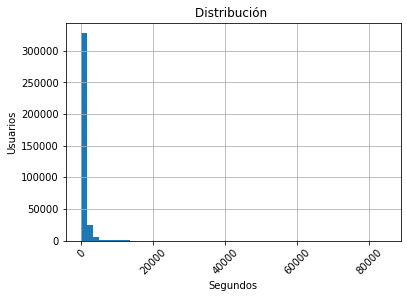

In [ ]:
# distribución 
visits['session_duration_sec'].hist(bins=50)
plt.title('Distribución ')
plt.xlabel('Segundos')
plt.ylabel('Usuarios')
plt.xticks(rotation=45)
plt.show()

Cuando la distribución es normal o casi normal, se puede tomar la media o la mediana. Pero en este caso es imposible, entonces tomamos la moda para calcular

In [ ]:
print(visits['session_duration_sec'].mode()) 

0    60
dtype: int64


La duración Promedio es de 1 minuto

## ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [ ]:
sticky_wau = dau_total / wau_total * 100
print(sticky_wau)
sticky_mau = dau_total / mau_total * 100
print(sticky_mau)




Uid    15.884409
dtype: float64
Uid    3.90897
dtype: float64


El factor de adherencia por día es del 15,8% y al mes es de 3.9%

# Ventas

## ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

In [ ]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
visits_.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
orders_ = orders.copy()

In [ ]:
# crear la columna 'primera compra' , 'primera_compra_mes' y 'mes_compra' 
primera_compra = orders_.groupby('Uid')['Buy Ts'].min()
primera_compra.name = 'primera_compra'
orders_ = orders_.join(primera_compra, on='Uid')
orders_['primera_compra_mes'] = orders_['primera_compra'].astype('datetime64[M]')
orders_['mes_compra'] = orders_['Buy Ts'].astype('datetime64[M]')
orders_.head()

,Buy Ts,Revenue,Uid,primera_compra,primera_compra_mes,mes_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [ ]:
# crear la columna primer_registro
primer_registro = visits_.groupby('Uid')['Start Ts'].min()
primer_registro.name = 'primer_registro'
visits_ = visits_.join(primer_registro, on='Uid')
visits_.head()

,Device,End Ts,Source Id,Start Ts,Uid,primer_registro
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00


In [ ]:
# unir los df "visits_ , orders_"
visitas = visits_.merge(orders_, on='Uid', how='inner')
visitas.head()

,Device,End Ts,Source Id,Start Ts,Uid,primer_registro,Buy Ts,Revenue,primera_compra,primera_compra_mes,mes_compra
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01


In [ ]:
# Cuanto tiempo demoro desde que se inscribió hasta que realizo su compra
tiempo_compra = visitas['primera_compra'] - visitas['primer_registro']
tiempo_compra.head()

0   0 days 00:20:00
1   0 days 00:20:00
2   0 days 15:11:00
3   0 days 15:11:00
4   0 days 15:11:00
dtype: timedelta64[ns]

In [ ]:
# unir la columna dias_compra al df
visitas = visitas.assign(dias_compra=tiempo_compra.values)
visitas.head()

,Device,End Ts,Source Id,Start Ts,Uid,primer_registro,Buy Ts,Revenue,primera_compra,primera_compra_mes,mes_compra,dias_compra
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,0 days 00:20:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,0 days 00:20:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,0 days 15:11:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,0 days 15:11:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,0 days 15:11:00


In [ ]:
# Calcular la media a "dias_compra"
visitas['dias_compra'].mean()

Timedelta('17 days 15:37:02.129909544')

En promedio demoran 17 días desde que se inscriben a realizar la compra

In [ ]:
# Tabla dinamica para calcular los ingresos por fuentes
ingresos_pivot = visitas.pivot_table(index= 'Source Id', columns= 'mes_compra', values= 'Revenue', fill_value=0)
ingresos_pivot

mes_compra,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
Source Id,,,,,,,,,,,,,
1,5.502451,9.527559,7.161385,12.989867,8.581261,9.092026,8.827170,6.745197,6.432797,11.599352,15.834166,7.162529,0.00
2,6.725303,6.813063,5.334911,12.650045,12.944226,7.395941,21.218282,9.148580,8.683977,11.598646,10.622225,6.834659,0.00
3,4.437207,6.869988,4.647399,7.247511,6.005468,5.500729,9.489813,4.840818,6.190074,6.024283,6.189934,5.565856,0.00
4,6.002714,7.856760,6.671353,12.243548,9.024949,6.186290,8.842557,6.284756,7.772168,8.129466,8.477336,5.894003,3.42
5,5.174092,5.207625,4.991391,8.467668,7.194639,6.060473,16.592249,6.214697,6.841029,7.411243,5.754198,5.012987,0.00
7,0.000000,0.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,3.673092,4.378744,3.806566,4.556382,4.193699,3.669162,3.855890,2.377684,3.493637,2.853473,6.155130,4.854952,0.00
10,4.604406,4.390957,5.736606,3.439124,3.278795,3.032617,2.424812,2.860952,3.323906,4.187366,3.512615,4.435353,0.00


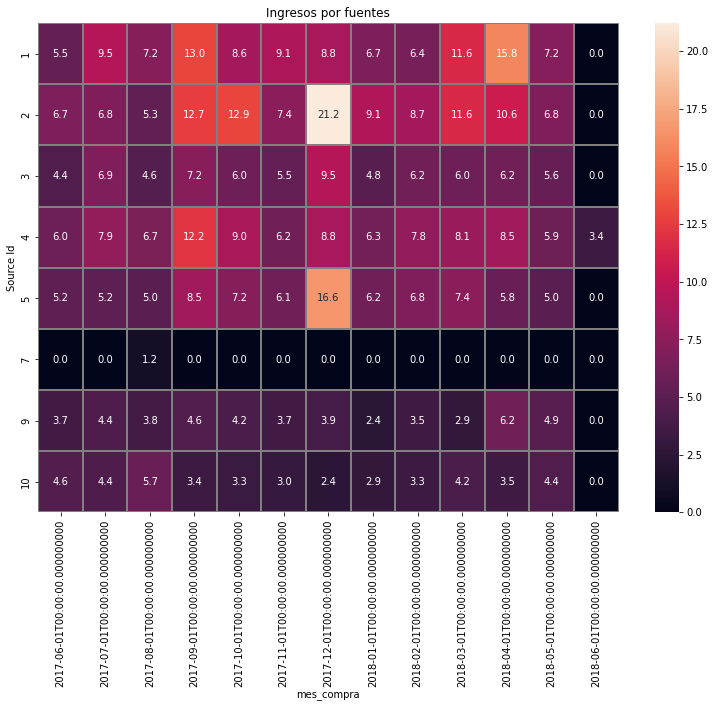

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Ingresos por fuentes')
sns.heatmap(
    ingresos_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

Según el gráfico anterior podemos ver que las fuentes 1, 2, y 4 son las más rentables.. 

## ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [ ]:
pedidos_periodo = orders_.groupby('mes_compra')['Uid'].nunique()
pedidos_periodo

mes_compra
2017-06-01    2023
2017-07-01    1984
2017-08-01    1472
2017-09-01    2750
2017-10-01    4675
2017-11-01    4547
2017-12-01    4942
2018-01-01    3898
2018-02-01    4258
2018-03-01    4181
2018-04-01    2744
2018-05-01    3544
2018-06-01       1
Name: Uid, dtype: int64

In [ ]:
pedidos_periodo.mean()

3155.3076923076924

Para un periodo dado de un mes la cantidad de pedidos que se realizan es 3.155 en promedio

## ¿Cuál es el tamaño promedio de compra?

In [ ]:
# agrupación de compra por mes 
orders_groupb = orders_.groupby(['primera_compra_mes', 'mes_compra']).agg({'Revenue': 'sum', 'Uid': 'nunique'})
orders_groupb.head()

Revenue   Uid
primera_compra_mes mes_compra               
2017-06-01         2017-06-01  9557.49  2023
                   2017-07-01   981.82    61
                   2017-08-01   885.34    50
                   2017-09-01  1931.30    54
                   2017-10-01  2068.58    88

In [ ]:
# Creación de columna 'revenue_por_persona' que significa el promedio de compra por persona
orders_groupb['revenue_por_persona'] = orders_groupb['Revenue'] / orders_groupb['Uid']
orders_groupb

Revenue   Uid  revenue_por_persona
primera_compra_mes mes_compra                                     
2017-06-01         2017-06-01   9557.49  2023             4.724414
                   2017-07-01    981.82    61            16.095410
                   2017-08-01    885.34    50            17.706800
                   2017-09-01   1931.30    54            35.764815
                   2017-10-01   2068.58    88            23.506591
...                                 ...   ...                  ...
2018-03-01         2018-05-01   1114.87    58            19.221897
2018-04-01         2018-04-01  10600.69  2276             4.657597
                   2018-05-01   1209.92    69            17.535072
2018-05-01         2018-05-01  13925.76  2988             4.660562
2018-06-01         2018-06-01      3.42     1             3.420000

[79 rows x 3 columns]

In [ ]:
# tamaño promedio de compra por usuario 
orders_groupb.pivot = orders_groupb.pivot_table(
    index='primera_compra_mes',
    columns='mes_compra',
    values='revenue_por_persona',
    aggfunc='mean',
)
orders_groupb.pivot

mes_compra,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
primera_compra_mes,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139062,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


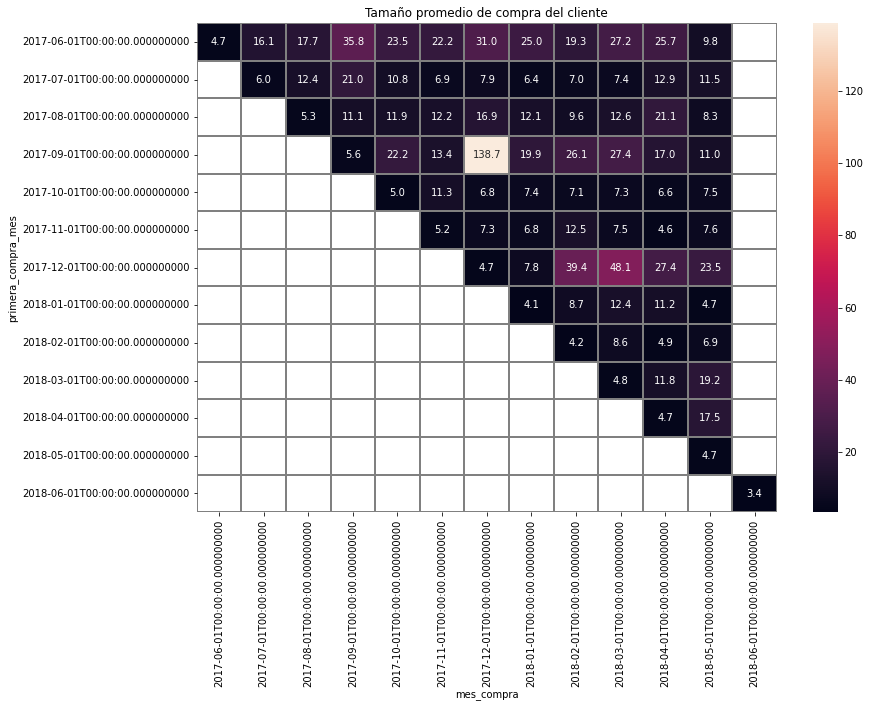

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra del cliente')
sns.heatmap(
    orders_groupb.pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

In [ ]:
# tamaño promedio de compra 
orders_groupb['revenue_por_persona'].median()

11.044651162790698

El tamaño de compra del cliente es 11 en promedio. 

## ¿Cuánto dinero traen? (LTV)

In [ ]:
cohort_sizes = orders_.groupby('primera_compra_mes').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['primera_compra_mes', 'n_buyers']
cohort_sizes.head() 

,primera_compra_mes,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [ ]:
cohorts = orders_.groupby(['primera_compra_mes', 'mes_compra']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head() 

,primera_compra_mes,mes_compra,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [ ]:
report = pd.merge(cohort_sizes, cohorts, on='primera_compra_mes')
report.head() 

,primera_compra_mes,n_buyers,mes_compra,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [ ]:
margin_rate = 0.5

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (
    report['mes_compra'] - report['primera_compra_mes']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,primera_compra_mes,n_buyers,mes_compra,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [ ]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='primera_compra_mes', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
primera_compra_mes,,,,,,,,,,,,
2017-06-01,2.362207,0.242664,0.218819,0.477336,0.511265,0.367751,0.47522,0.290796,0.276607,0.302894,0.28563,0.128428
2017-07-01,3.005109,0.167605,0.311765,0.179488,0.088396,0.078024,0.060104,0.07091,0.080616,0.073573,0.077837,
2017-08-01,2.638259,0.235996,0.229241,0.195639,0.247026,0.14177,0.105332,0.202504,0.146106,0.093989,,
2017-09-01,2.822265,0.558793,0.260465,1.987896,0.200279,0.323534,0.350804,0.121575,0.092003,,,
2017-10-01,2.501866,0.267881,0.095697,0.078573,0.07578,0.060181,0.042408,0.057735,,,,
2017-11-01,2.577341,0.199617,0.099778,0.162476,0.074006,0.026939,0.057464,,,,,
2017-12-01,2.369095,0.130187,0.462548,0.532637,0.156465,0.169023,,,,,,
2018-01-01,2.067818,0.147379,0.152141,0.071389,0.031349,,,,,,,
2018-02-01,2.078494,0.139137,0.039258,0.037072,,,,,,,,


In [ ]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

5.939616905585764

El "LTV" de compra del cohorte de "01-06-2017" es de 5.9 

# Marketing

## ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [ ]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
# Creación de columna 'mes' 
costs['mes'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,mes
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [ ]:
# Tabla dinamica para calcular el costo por fuente
gastos = costs.pivot_table(index= 'source_id', columns= 'mes', values= 'costs')
gastos

mes,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,37.520333,34.609032,30.703548,50.067000,74.701613,81.505333,75.522581,70.521935,78.731429,63.103000,45.775517,47.342258
10,10.474000,10.639355,7.502258,15.355667,20.233548,26.412000,20.834194,19.817742,17.174286,17.547000,13.387931,13.221290
2,80.912667,75.261613,58.420968,99.522000,156.290323,174.922667,157.993548,134.120645,159.797857,131.438000,103.231034,86.756129
3,257.721667,247.560323,198.178710,332.118333,507.652903,567.511333,523.210323,477.702581,508.162857,436.028333,320.579655,303.594194
4,117.160000,113.862258,103.785806,173.075333,207.123871,179.627333,247.757097,188.154516,203.998571,198.729000,152.016897,135.942258
5,87.204000,96.714194,70.492903,128.304667,186.045161,210.844667,189.436129,173.274839,181.118214,146.116774,120.729310,118.372903
9,9.507333,9.759355,8.030000,13.854000,19.658387,22.772667,21.225161,17.650323,19.696429,16.009667,12.878966,11.682903


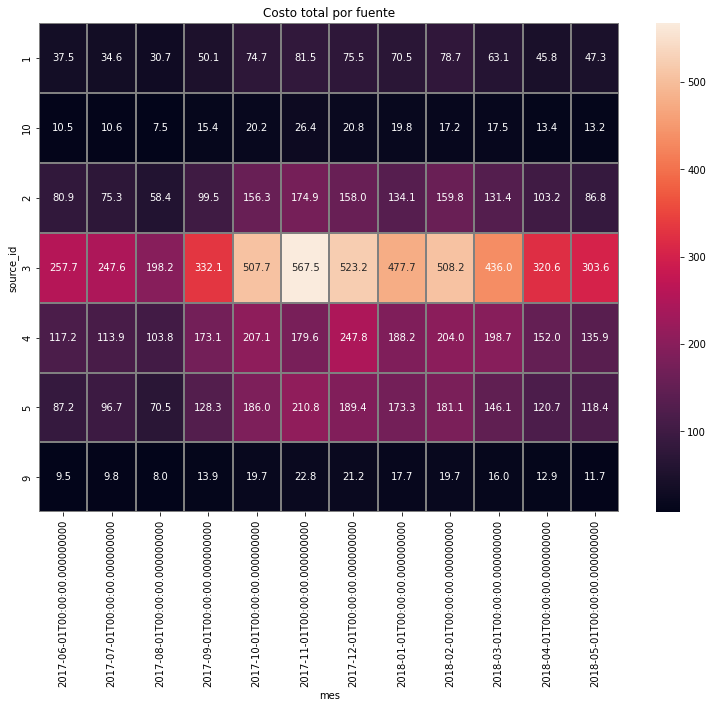

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Costo total por fuente')
sns.heatmap(
    gastos,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

En este gráfico podemos ver que la fuente 3 es la más costosa de todas las otras fuentes, seguido de la fuente 4 y 5. 

## ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [ ]:
# Creación del DF, para el cálculo de 'CAC'
report_ = pd.merge(report, costs, left_on='primera_compra_mes', right_on='mes')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,primera_compra_mes,n_buyers,mes_compra,Revenue,gp,age,ltv,source_id,dt,costs,mes,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-01,75.20,2017-06-01,0.037173
1,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-02,62.25,2017-06-01,0.030771
2,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-03,36.53,2017-06-01,0.018057
3,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-04,55.00,2017-06-01,0.027187
4,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-05,57.08,2017-06-01,0.028216


In [ ]:
# Tabla dinamica con el valor del 'CAC'
cac_costs = report_.pivot_table(index='source_id',columns='mes',values='cac',aggfunc='sum')
cac_costs

mes,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,6.676876,6.137119,6.947518,5.237540,4.268664,4.194099,3.204928,3.240706,2.415207,1.607492,1.166511,0.491168
10,1.863885,1.886646,1.697591,1.606366,1.156203,1.359108,0.884134,0.910688,0.526847,0.446994,0.341169,0.137169
2,14.398695,13.345923,13.219343,10.411058,8.930876,9.001166,6.704723,6.163267,4.902043,3.348265,2.630668,0.900080
3,45.862481,43.899152,44.843358,34.743103,29.008737,29.202985,22.203313,21.951942,15.588672,11.107430,8.169429,3.149739
4,20.849036,20.190863,23.484380,18.105517,11.835650,9.243259,10.513990,8.646294,6.257968,5.062443,3.873893,1.410378
5,15.518260,17.150047,15.950949,13.422030,10.631152,10.849640,8.039042,7.962526,5.556078,3.846267,3.076582,1.228099
9,1.691864,1.730598,1.817007,1.449275,1.123336,1.171835,0.900726,0.811088,0.604218,0.407832,0.328199,0.121208


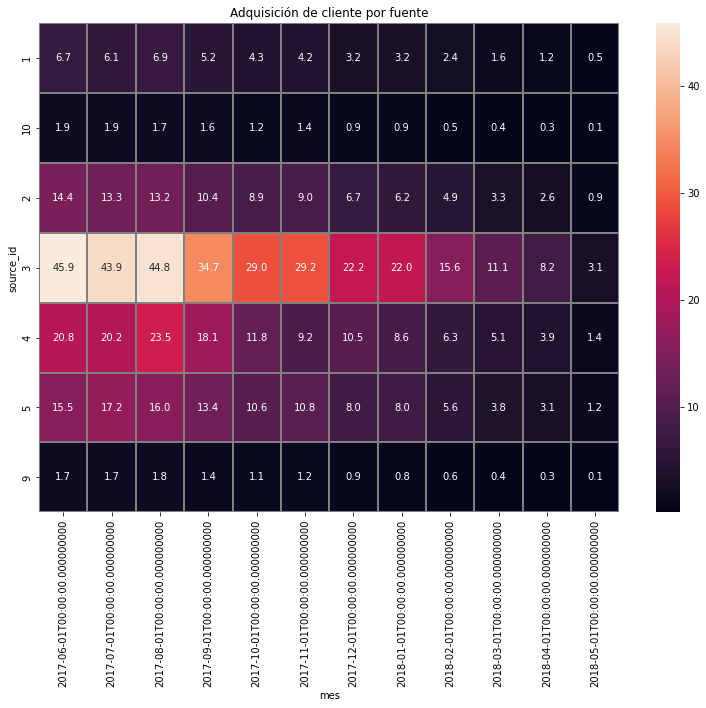

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Adquisición de cliente por fuente')
sns.heatmap(
    cac_costs,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

En el gráfico muestra el costo de traer a cada cliente por fuente, aquí nuevamente podemos decir que la fuente número 3 es la más costosa, seguido de la fuente 4 y 5

## ¿Cuán rentables eran las inversiones? (ROI)

In [ ]:
total_ingreso = orders['Revenue'].sum()
total_ingreso

252057.19999999998

In [ ]:
total_costos = costs['costs'].sum()
total_costos

329131.62

In [ ]:
# Beneficio bruto = facturación - costo primo
bb = total_ingreso - total_costos
bb

-77074.42000000001

In [ ]:
# Beneficio neto - inversion / inversion
roi = (-77074 - 329132) / 329132
print(f'El ROI actual de la inversión es {roi} %')

El ROI actual de la inversión es -1.2341735230849629 %


# Etapa 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

## ¿Qué fuentes/plataformas recomendarías?

Las fuentes de marketing que recomiendo son las fuentes 1, 2, 9 y 10, esto según el gráfico 'Ingresos por fuentes'

## ¿en qué métricas te enfocaste?

Para poder realizar esta recomendación me enfoqué en la métrica 'LTV y CAC'

## ¿Por qué?

Porque estas métricas me dan los ingresos por fuentes y el costo por fuente, es lo más asimétrico que se puede calcular en este proyecto.

## ¿Qué conclusiones sacaste después de encontrar los valores métricos?

En cuanto a las fuentes podemos decir que la fuente 1 es la más rentable de todas, y para la empresa sus gastos estan bien proporcionados, no así la fuente 4 y 5, que a pesar de que son más rentables que la 9 y la 10, aun así no las recomiendo, porque el costo de estas es muy alto lo que genera una perdida. Y definitivamente la fuente 3 se deberían eliminar directamente debido a que es una fuente muy cara en comparación de los ingresos que trae, por ende ese dinero se debe redirigir a la fuente 1 y 2, que son bien rentables y en cuanto a sus costos no son altos lo que genera una utilidad.

# Etapa 4 Conclusión Final 

La empresa tiene perdida, debido a que sus gastos de marketing estan mal direccionados, como mencione en la conclusión anterior, es lo único que podría decir de este proyecto debido a no tener el detalle de los costos no puedo calcular el costo variable unitario, y los costos fijos, que me podría ayudar a encontrar el punto de equilibrio de la empresa, pero si sigue mi recomendación, la empresa tendría utilidad, debido a que con todo el dinero que gastan en la fuente 3, con la fuente 1 y 2 generarían muchos más ingresos, debido a que estas fuentes traen más ingresos a menor costo, lo que generaría utilidades para la empresa.